## Object-oriented KMeans Clustering implementation

In this repo is an implementation of the KMeans clustering algorithm using an object oriented approach, vaguely in the style of **SKlearn**.

The KMeans algorithm is an unsupervised learning technique for clustering similar data points. 

The algorithm is as follows:


  1. Initialize K centroids by choosing K random samples from the data
  2. For each data point:
    - Calculate distance to each centroid
    - Assign the point to the centroid to which it has the lowest distance
  3. Update each centroid to the mean location of all the data points assigned to it
  
This algorithm is then repeated a given number of times, or until the algorithm converges.


## Usage

In [97]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from kmeans import kmeans

In [98]:
# Load sample data (the iris data set)
X = datasets.load_iris().data
y = datasets.load_iris().target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

With the data loaded, we can initialize and train the model:

In [99]:
model = kmeans.Kmeans(k=10,
                      num_iter=100,
                      dist_func=kmeans.euclidean_dist,
                      random_state=10,
                      score=False)

Note that the above are all defaults, so the algorithm can be more succinctly initialized as:

In [100]:
model = kmeans.Kmeans(k=3, random_state=100)

We then fit the model using:

In [101]:
model.fit(X_train)

In [102]:
# Printing the model displays the final error (sum of squared errors)
# and the number of iterations until the model converged
model

Kmeans model fit!        
 Final SSE: 93.528         
 Converged in: 7 iterations

We can make predictions on new data using:

In [103]:
preds = model.predict(X_test)
preds[1:10]

array([ 0.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  2.])

### Visualization of Results

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [105]:
import numpy as np

#Make the cluster labels match - due to the unsupervised nature, labels are not
# identical, even if the clusters are correct
y_train = np.where(y_train == 2, 1,
                 np.where(y_train == 0, 0, 2))

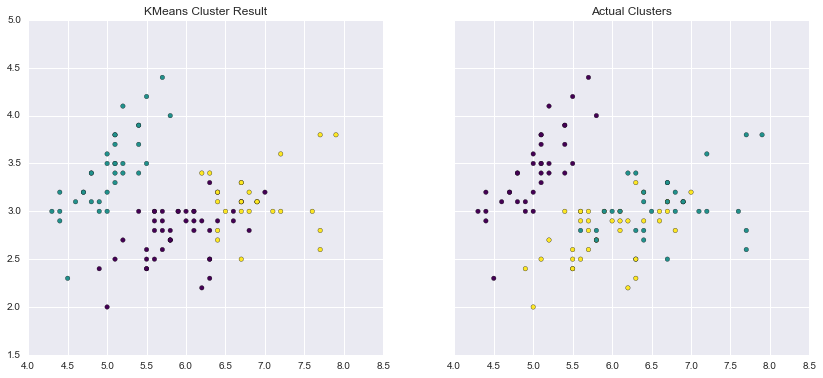

In [106]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 6))
ax1.scatter(x=X_train[:,0], y=X_train[:,1], c=model.results, cmap="viridis")
ax1.set_title('KMeans Cluster Result')
ax2.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train, cmap="viridis")
ax2.set_title('Actual Clusters');

Finally, we can visualize the convergence of the algorithm by using the `score` parameter. This will calculate the sum of the squared error at each iteration:

In [112]:
model = kmeans.Kmeans(score=True)
model.fit(X)
model

Kmeans model fit!        
 Final SSE: 52.542         
 Converged in: 8 iterations

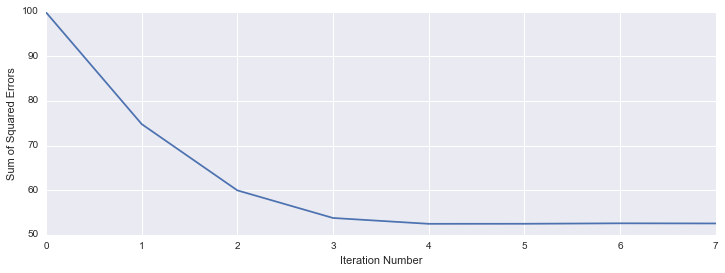

In [129]:
plt.figure(figsize=(12,4))
plt.plot(range(8), model.iterscore[1:9])
plt.ylabel("Sum of Squared Errors")
plt.xlabel("Iteration Number");